In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dictionary_form = {'gender': np.random.choice(["female", "male"], 100),               
                   'faculty': np.random.choice(["COE", "EEE", "IE"], 100),
                   'gpa': np.random.uniform(0, 4, 100),  
                   'id': np.random.randint(1000000, 9999999, 100)} 

In [4]:
df = pd.DataFrame(dictionary_form)
df.head()

,gender,faculty,gpa,id
0,female,EEE,0.263456,9044774
1,female,IE,1.910656,1812656
2,male,EEE,1.576237,6847444
3,male,IE,0.974190,9343850
4,male,IE,2.945342,7690846


In [5]:
df.tail(7)

,gender,faculty,gpa,id
93,male,IE,1.883833,3807086
94,female,EEE,0.456573,7844972
95,male,EEE,0.433758,6050483
96,female,EEE,2.744853,3570980
97,male,EEE,3.770702,2556029
98,female,COE,0.579055,5732234
99,female,IE,1.773808,6473123


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   100 non-null    object 
 1   faculty  100 non-null    object 
 2   gpa      100 non-null    float64
 3   id       100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [7]:
df.columns

Index(['gender', 'faculty', 'gpa', 'id'], dtype='object')

In [8]:
df.shape

(100, 4)

In [9]:
df.size

400

Sütun veri dönüşümleri

[!] Uyarı: Python'daki dönüştürme hataları astype yöntemi için geçerlidir. Örneğin, bir sütunda içinde harf olan bir hücre varsa, o sütunu tamsayıya veya kayan sayıya dönüştürmek için bir hataya neden olur.


In [10]:
# df['faculty']= df['faculty'].astype('float64')

In [11]:
object_columns= df.select_dtypes("object").columns

In [12]:
for colname in object_columns:
  df[colname]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   100 non-null    object 
 1   faculty  100 non-null    object 
 2   gpa      100 non-null    float64
 3   id       100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [14]:
df["gender"]

0     female
1     female
2       male
3       male
4       male
       ...  
95      male
96    female
97      male
98    female
99    female
Name: gender, Length: 100, dtype: object

In [15]:
df.loc[30:40, "gender"]

30      male
31      male
32    female
33      male
34      male
35    female
36    female
37      male
38      male
39    female
40    female
Name: gender, dtype: object

In [16]:
df.iloc[30:40]

,gender,faculty,gpa,id
30,male,COE,0.208049,7282739
31,male,COE,1.265130,8694000
32,female,COE,2.805408,9499077
33,male,EEE,0.478468,6704795
34,male,COE,0.342323,4247825
35,female,COE,1.877912,2454063
36,female,IE,0.754230,9008244
37,male,COE,0.740670,1301030
38,male,EEE,1.209926,5485832
39,female,COE,3.088495,5878867


In [17]:
faculty_groups= df.groupby("faculty")

faculty_groups["gender"].value_counts()

faculty  gender
COE      male      17
         female    14
EEE      male      16
         female    15
IE       male      21
         female    17
Name: gender, dtype: int64

In [18]:
gender_groups= df.groupby("gender")

gender_groups["faculty"].value_counts()

gender  faculty
female  IE         17
        EEE        15
        COE        14
male    IE         21
        COE        17
        EEE        16
Name: faculty, dtype: int64

In [19]:
faculty_groups["gpa"].mean()

faculty
COE    2.006112
EEE    1.857438
IE     2.124102
Name: gpa, dtype: float64

In [20]:
faculty_gender_groups= df.groupby(["gender", "faculty"])

In [21]:
faculty_gender_groups["gpa"].mean()

gender  faculty
female  COE        2.322462
        EEE        1.872154
        IE         2.162279
male    COE        1.745589
        EEE        1.843642
        IE         2.093198
Name: gpa, dtype: float64

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
male= df.loc[df["gender"]== "male"]

In [24]:
female= df.loc[df["gender"]== "female"]

Text(0, 0.5, 'Student')

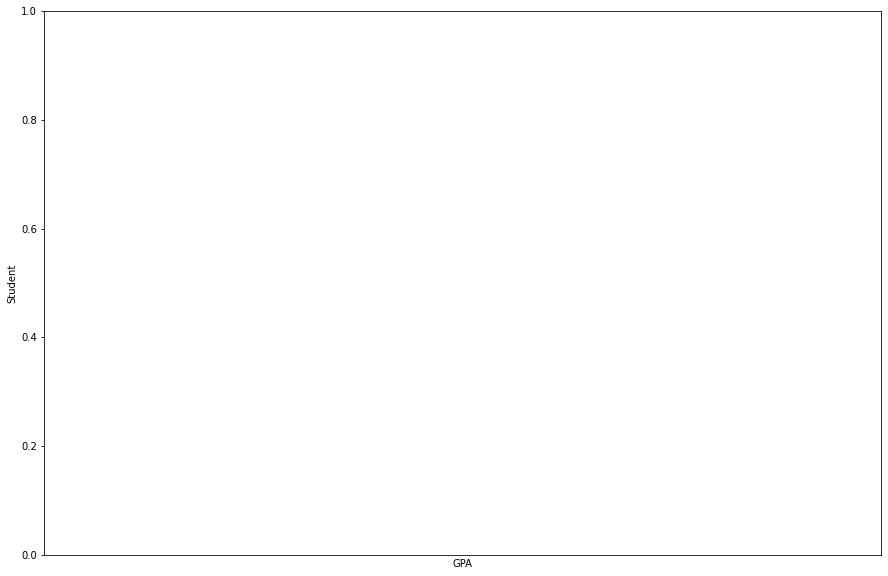

In [25]:
plt.figure(figsize= (15,10))
plt.xticks([])
plt.xlabel("GPA-STUDENT")
plt.xlabel("GPA")
plt.ylabel("Student")

Text(105, 1.9098228765046674, 'Male Gpa Average')

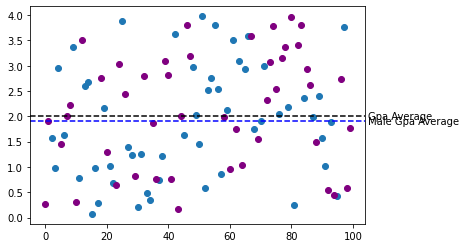

In [26]:
# kadın ve erkek gpa'lerinin cizimi

plt.scatter(male.index, male["gpa"])
plt.scatter(female.index, female["gpa"], color= "purple")

# tum ögrencilerin genel not ortalamalarini cizdirelim

plt.axhline(df["gpa"].mean(), linestyle="dashed" , color="black")
plt.text(105, df["gpa"].mean(), 'Gpa Average', ha="left", va="center")

plt.axhline(male["gpa"].mean(), linestyle= "dashed" , color="blue" )
plt.text(105, male["gpa"].mean(), 'Male Gpa Average', ha="left", va="center")


In [27]:
# YENI BIR DATAFRAME OLUSTURALIM

# CINSIYET KIMLIK VE 5 DERS OLSUN 

dataframe_dictionary={ 
    "id": np.random.randint(100, 10000,100),
    "cinsiyet": np.random.choice(["female", "male"], 100),
    "Veri Yapilari": np.random.randint(0,100,100),
    "Veritabani Sistemleri": np.random.randint(0,100,100),
    "Bilgisayar Mimarisi": np.random.randint(0,100,100),
    "Siber Guvenlik": np.random.randint(0,100,100),
    "Bilgisayar Gormesi": np.random.randint(0,100,100)    

}



In [28]:
df= pd.DataFrame(dataframe_dictionary)

In [29]:
df

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Bilgisayar Gormesi
0,6153,male,51,17,99,83,4
1,3119,female,3,97,68,61,1
2,2225,female,5,25,65,20,35
3,4447,male,59,93,93,47,78
4,4431,male,84,94,30,14,79
...,...,...,...,...,...,...,...
95,7893,female,11,30,8,22,90
96,9486,male,47,12,67,44,15
97,6992,female,70,28,29,68,49
98,4529,male,19,30,37,25,75


In [30]:
df.describe()

,id,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Bilgisayar Gormesi
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4997.48000,47.660000,46.450000,50.480000,45.280000,48.930000
std,2997.42769,30.775899,28.977656,28.421958,27.126743,32.138983
min,211.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2206.25000,16.500000,23.750000,29.000000,20.750000,16.500000
50%,5135.00000,51.000000,44.000000,52.000000,43.500000,51.000000
75%,7620.50000,72.500000,66.250000,72.000000,67.250000,79.000000
max,9884.00000,98.000000,99.000000,99.000000,99.000000,99.000000


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,4997.48,2997.427690,211.0,2206.25,5135.0,7620.50,9884.0
Veri Yapilari,100.0,47.66,30.775899,0.0,16.50,51.0,72.50,98.0
Veritabani Sistemleri,100.0,46.45,28.977656,0.0,23.75,44.0,66.25,99.0
Bilgisayar Mimarisi,100.0,50.48,28.421958,0.0,29.00,52.0,72.00,99.0
Siber Guvenlik,100.0,45.28,27.126743,0.0,20.75,43.5,67.25,99.0
Bilgisayar Gormesi,100.0,48.93,32.138983,0.0,16.50,51.0,79.00,99.0


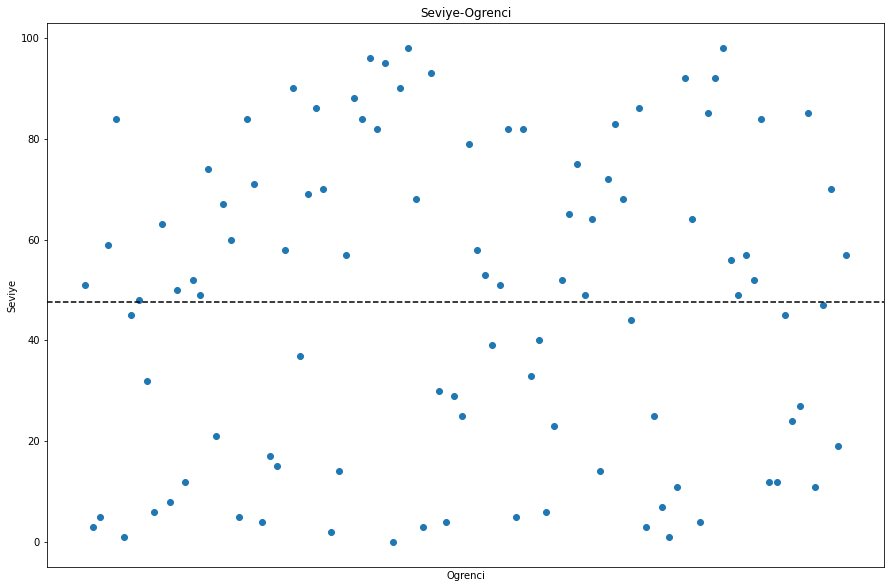

In [32]:
plt.figure(figsize=(15,10))
plt.xticks([])
plt.title("Seviye-Ogrenci")
plt.xlabel("Ogrenci")
plt.ylabel("Seviye")

# Plot grades
plt.scatter(df["Veri Yapilari"].index, df["Veri Yapilari"])

# Draw mean line
plt.axhline(df["Veri Yapilari"].mean(), linestyle ="dashed", color="black")
plt.show()

In [33]:
df["Veri Yapilari"].mean()

47.66

In [34]:

df_columns = ["Veri Yapilari","Bilgisayar Mimarisi"]

for col in df_columns:
  if df[col].mean() < 60:  
    df[col] = df[col] + (60-df[col].mean())  
    df.loc[df[col] > 100, col] = 100 

In [35]:
gecen_ogr = df.loc[df["Veri Yapilari"] >= 59.5, "Veri Yapilari"]

gecen_ogr

0      63.34
3      71.34
4      96.34
7      60.34
10     75.34
12     62.34
14     64.34
15     61.34
16     86.34
18     79.34
19     72.34
21     96.34
22     83.34
26     70.34
27    100.00
29     81.34
30     98.34
31     82.34
34     69.34
35    100.00
36     96.34
37    100.00
38     94.34
39    100.00
41    100.00
42    100.00
43     80.34
45    100.00
50     91.34
51     70.34
52     65.34
54     63.34
55     94.34
57     94.34
62     64.34
63     77.34
64     87.34
65     61.34
66     76.34
68     84.34
69     95.34
70     80.34
72     98.34
78    100.00
79     76.34
81     97.34
82    100.00
83    100.00
84     68.34
85     61.34
86     69.34
87     64.34
88     96.34
94     97.34
97     82.34
99     69.34
Name: Veri Yapilari, dtype: float64

In [36]:
stacked_df= df.stack()


In [37]:
stacked_df

0   id                        6153
    cinsiyet                  male
    Veri Yapilari            63.34
    Veritabani Sistemleri       17
    Bilgisayar Mimarisi      100.0
                             ...  
99  Veri Yapilari            69.34
    Veritabani Sistemleri       23
    Bilgisayar Mimarisi      37.52
    Siber Guvenlik               8
    Bilgisayar Gormesi          89
Length: 700, dtype: object

In [38]:

np.where(stacked_df[0].index=="id")

(array([0]),)

In [39]:
melted_df= pd.melt(df,id_vars=["cinsiyet"], value_vars=["Veri Yapilari", "Bilgisayar Mimarisi"])

In [40]:
melted_df

,cinsiyet,variable,value
0,male,Veri Yapilari,63.34
1,female,Veri Yapilari,15.34
2,female,Veri Yapilari,17.34
3,male,Veri Yapilari,71.34
4,male,Veri Yapilari,96.34
...,...,...,...
195,female,Bilgisayar Mimarisi,17.52
196,male,Bilgisayar Mimarisi,76.52
197,female,Bilgisayar Mimarisi,38.52
198,male,Bilgisayar Mimarisi,46.52


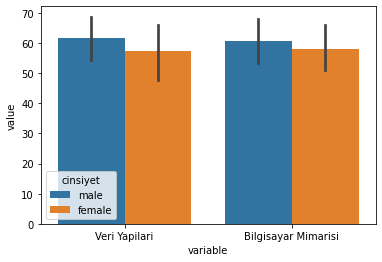

In [41]:
sns.barplot(data=melted_df, x="variable", y="value", hue="cinsiyet")

In [42]:
cinsiyet_dropped = df.drop("cinsiyet", axis=1, inplace=False)  
cinsiyet_dropped

,id,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Bilgisayar Gormesi
0,6153,63.34,17,100.00,83,4
1,3119,15.34,97,77.52,61,1
2,2225,17.34,25,74.52,20,35
3,4447,71.34,93,100.00,47,78
4,4431,96.34,94,39.52,14,79
...,...,...,...,...,...,...
95,7893,23.34,30,17.52,22,90
96,9486,59.34,12,76.52,44,15
97,6992,82.34,28,38.52,68,49
98,4529,31.34,30,46.52,25,75


In [43]:
df["Etik"] = np.random.randint(0, 100, df.shape[0])
df

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Bilgisayar Gormesi,Etik
0,6153,male,63.34,17,100.00,83,4,67
1,3119,female,15.34,97,77.52,61,1,49
2,2225,female,17.34,25,74.52,20,35,72
3,4447,male,71.34,93,100.00,47,78,76
4,4431,male,96.34,94,39.52,14,79,72
...,...,...,...,...,...,...,...,...
95,7893,female,23.34,30,17.52,22,90,31
96,9486,male,59.34,12,76.52,44,15,95
97,6992,female,82.34,28,38.52,68,49,7
98,4529,male,31.34,30,46.52,25,75,84


In [44]:
# index yerleri degistirme

cols = df.columns.tolist()
cols[-1], cols[-2] = cols[-2], cols[-1]
cols

df = df.reindex(cols,axis=1)
df

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
0,6153,male,63.34,17,100.00,83,67,4
1,3119,female,15.34,97,77.52,61,49,1
2,2225,female,17.34,25,74.52,20,72,35
3,4447,male,71.34,93,100.00,47,76,78
4,4431,male,96.34,94,39.52,14,72,79
...,...,...,...,...,...,...,...,...
95,7893,female,23.34,30,17.52,22,31,90
96,9486,male,59.34,12,76.52,44,95,15
97,6992,female,82.34,28,38.52,68,7,49
98,4529,male,31.34,30,46.52,25,84,75


In [45]:
df.isnull()

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [46]:
df.isna()

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [47]:
df.isna().sum()

id                       0
cinsiyet                 0
Veri Yapilari            0
Veritabani Sistemleri    0
Bilgisayar Mimarisi      0
Siber Guvenlik           0
Etik                     0
Bilgisayar Gormesi       0
dtype: int64

In [48]:
df.at[100, "Etik"] = np.nan


In [49]:
df.tail()

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
96,9486.0,male,59.34,12.0,76.52,44.0,95.0,15.0
97,6992.0,female,82.34,28.0,38.52,68.0,7.0,49.0
98,4529.0,male,31.34,30.0,46.52,25.0,84.0,75.0
99,8377.0,male,69.34,23.0,37.52,8.0,67.0,89.0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df= df.dropna()
df

,id,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
0,6153.0,male,63.34,17.0,100.00,83.0,67.0,4.0
1,3119.0,female,15.34,97.0,77.52,61.0,49.0,1.0
2,2225.0,female,17.34,25.0,74.52,20.0,72.0,35.0
3,4447.0,male,71.34,93.0,100.00,47.0,76.0,78.0
4,4431.0,male,96.34,94.0,39.52,14.0,72.0,79.0
...,...,...,...,...,...,...,...,...
95,7893.0,female,23.34,30.0,17.52,22.0,31.0,90.0
96,9486.0,male,59.34,12.0,76.52,44.0,95.0,15.0
97,6992.0,female,82.34,28.0,38.52,68.0,7.0,49.0
98,4529.0,male,31.34,30.0,46.52,25.0,84.0,75.0


In [51]:
df= df.set_index("id")
df

,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
id,,,,,,,
6153.0,male,63.34,17.0,100.00,83.0,67.0,4.0
3119.0,female,15.34,97.0,77.52,61.0,49.0,1.0
2225.0,female,17.34,25.0,74.52,20.0,72.0,35.0
4447.0,male,71.34,93.0,100.00,47.0,76.0,78.0
4431.0,male,96.34,94.0,39.52,14.0,72.0,79.0
...,...,...,...,...,...,...,...
7893.0,female,23.34,30.0,17.52,22.0,31.0,90.0
9486.0,male,59.34,12.0,76.52,44.0,95.0,15.0
6992.0,female,82.34,28.0,38.52,68.0,7.0,49.0


In [52]:
df.head()

,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Bilgisayar Mimarisi,Siber Guvenlik,Etik,Bilgisayar Gormesi
id,,,,,,,
6153.0,male,63.34,17.0,100.00,83.0,67.0,4.0
3119.0,female,15.34,97.0,77.52,61.0,49.0,1.0
2225.0,female,17.34,25.0,74.52,20.0,72.0,35.0
4447.0,male,71.34,93.0,100.00,47.0,76.0,78.0
4431.0,male,96.34,94.0,39.52,14.0,72.0,79.0


In [55]:
df= df.drop(["Bilgisayar Mimarisi"], axis=1)

In [57]:
df.head()

,cinsiyet,Veri Yapilari,Veritabani Sistemleri,Siber Guvenlik,Etik,Bilgisayar Gormesi
id,,,,,,
6153.0,male,63.34,17.0,83.0,67.0,4.0
3119.0,female,15.34,97.0,61.0,49.0,1.0
2225.0,female,17.34,25.0,20.0,72.0,35.0
4447.0,male,71.34,93.0,47.0,76.0,78.0
4431.0,male,96.34,94.0,14.0,72.0,79.0


In [59]:
cinsiyet_grup= df.groupby("cinsiyet")
cinsiyet_grup

In [64]:
df_bilg_gorm_mean= df.groupby(["cinsiyet"]).agg({"Bilgisayar Gormesi": "mean"})

In [65]:
df_bilg_gorm_mean

,Bilgisayar Gormesi
cinsiyet,
female,52.333333
male,45.387755


In [66]:
df_veri_yap_mean= df.groupby(["cinsiyet"]).agg({ "Siber Guvenlik": "mean"})

df_veri_yap_mean

,Siber Guvenlik
cinsiyet,
female,42.333333
male,48.346939
